<a href="https://colab.research.google.com/github/gurlv/MusicMLClassification/blob/main/MSAAI_511_GRP_5_Composer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tej Singh, Gurleen Virk,  Matt Thompson
# Final Team Project: Music Genre and Composure Classification
# AAI 511 Group 5

In [3]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=7c469c28f3cd8cc4200d93aeb4e7fabfa3bdb88bf6d78b029c593b7c2d65a735
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty_midi


## 1. Find and count the .mid (MIDI) files in the data directories

In [4]:
import numpy as np
import pandas as pd
import pretty_midi
import warnings
warnings.filterwarnings('ignore')

In [5]:
 import os

 # Import the drive function from google.colab
 # Mount Google Drive
 from google.colab import drive
 drive.mount('/content/drive')

 # Specify the path to the data files by composer: Mozart
mozart_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart'
mozart_concertos_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Piano Concertos'
mozart_sonatas_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Piano Sonatas'
mozart_symphonies_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Symphonies'
mozart_Chelsea_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/The Chelsea Notebook'

# Specify the path to the data files by composer: Chopin
chopin_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Chopin'

# Specify the path to the data files by composer: Beethoven
beethoven_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven'
beethoven_symphonies_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven/Symphonies'
beethoven_sonatas_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven/Piano Sonatas'

# Specify the path to the data files by composer: Bach
bach_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach'
bach_harp_concertos_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Harpsichord Concertos'
bach_concertos_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Concertos'
bach_artoffugue_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/TheArtOfFugue'
bach_nusicaloffering_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv1079 The Musical Offering'
bach_orchestralsuites_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv1066-1069 Orchestral Suites'
bach_goldbertvariations_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv988 The Goldberg Variations'
bach_clavier1_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv846-869 The Well Tempered Clavier Book 1'
bach_clavier2_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv870-893 The Well Tempered Clavier Book 2'
bach_sinfonias_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv787-801 Three Part Inventions (Sinfonias)'
bach_twopart_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv772-786 Two Part Inventions'
bach_matthew_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Matthew Passion'
bach_mass_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv232 Mass'
bach_400chorales_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/Bwv001- 400 Chorales'
bach_notebook_dataset_path = '/content/drive/My Drive/Colab Notebooks/Musicians/Bach/LittleNotebook'


# Create lists of the dataset paths
mozart_dataset_path_list = [
    mozart_dataset_path,
    mozart_concertos_dataset_path,
    mozart_sonatas_dataset_path,
    mozart_symphonies_dataset_path,
    mozart_Chelsea_dataset_path
]

chopin_dataset_path_list = [
   chopin_dataset_path
]

beethoven_dataset_path_list = [
    beethoven_dataset_path,
    beethoven_symphonies_dataset_path,
    beethoven_sonatas_dataset_path
]

bach_dataset_path_list = [
    bach_dataset_path,
    bach_harp_concertos_dataset_path,
    bach_concertos_dataset_path,
    bach_artoffugue_dataset_path,
    bach_nusicaloffering_dataset_path,
    bach_orchestralsuites_dataset_path,
    bach_goldbertvariations_dataset_path,
    bach_clavier1_dataset_path,
    bach_clavier2_dataset_path,
    bach_sinfonias_dataset_path,
    bach_twopart_dataset_path,
    bach_matthew_dataset_path,
    bach_mass_dataset_path,
    bach_400chorales_dataset_path,
    bach_notebook_dataset_path
]

# Initialize a variable to store the total count
mozart_total_mid_files = 0
chopin_total_mid_files = 0
beethoven_total_mid_files = 0
bach_total_mid_files = 0

# Iterate through each Mozart path and count the .mid files
print()
for path in mozart_dataset_path_list:
    mid_file_count = 0
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.mid'):
                mid_file_count += 1
        print(f"Number of .mid files in '{path}': {mid_file_count}")
        mozart_total_mid_files += mid_file_count
    else:
        print(f"Path not found or is not a directory: '{path}'")

# Print the total number of .mid files for Mozart
print()
print(f"Total number of .mid files for Mozart: {mozart_total_mid_files}")
print()


## Chopin
# Iterate through each Chopin path and count the .mid files
print()
for path in chopin_dataset_path_list:
    mid_file_count = 0
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.mid'):
                mid_file_count += 1
        print(f"Number of .mid files in '{path}': {mid_file_count}")
        chopin_total_mid_files += mid_file_count
    else:
        print(f"Path not found or is not a directory: '{path}'")

# Print the total number of .mid files for Chopin
print(f"Total number of .mid files for Chopin: {chopin_total_mid_files}")
print()


## Beethoven
# Iterate through each Beethoven path and count the .mid files
print()
for path in beethoven_dataset_path_list:
    mid_file_count = 0
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.mid'):
                mid_file_count += 1
        print(f"Number of .mid files in '{path}': {mid_file_count}")
        beethoven_total_mid_files += mid_file_count
    else:
        print(f"Path not found or is not a directory: '{path}'")

# Print the total number of .mid files for Beethoven
print(f"Total number of .mid files for Beethoven: {beethoven_total_mid_files}")
print()


## Bach
# Iterate through each Mozart path and count the .mid files
print()
for path in bach_dataset_path_list:
    mid_file_count = 0
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.mid'):
                mid_file_count += 1
        print(f"Number of .mid files in '{path}': {mid_file_count}")
        bach_total_mid_files += mid_file_count
    else:
        print(f"Path not found or is not a directory: '{path}'")

# Print the total number of .mid files for Bach
print(f"Total number of .mid files for Bach: {bach_total_mid_files}")
print()


Mounted at /content/drive

Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart': 90
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Piano Concertos': 36
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Piano Sonatas': 19
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/Symphonies': 54
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Mozart/The Chelsea Notebook': 20

Total number of .mid files for Mozart: 219


Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Chopin': 136
Total number of .mid files for Chopin: 136


Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven': 133
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven/Symphonies': 34
Number of .mid files in '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven/Piano Sonatas': 45
T

# Load all `.mid` files from the various Mozart dataset paths, clean the filenames by removing spaces and punctuation (except for the `.mid` extension), and store the cleaned filenames and the corresponding MIDI data.

## Define a function to clean filenames



In [6]:
import re

# The filenames have spaces and some additional punctuation that might be helpful to remove

def clean_filename(filename):
    """
    Cleans a filename by removing spaces and punctuation, preserving the .mid extension.

    Args:
        filename: The original filename string.

    Returns:
        The cleaned filename string.
    """
    # Separate the filename and extension
    name, ext = os.path.splitext(filename)

    # Remove spaces and punctuation from the name using regex
    cleaned_name = re.sub(r'[^\w-]', '', name) # Keep alphanumeric characters and hyphens

    # Recombine the cleaned name and original extension
    cleaned_filename = cleaned_name + ext

    return cleaned_filename

## Iterate through directories and load the midi files

Loop through the Mozart dataset paths, read each `.mid` file, apply the cleaning function to the filename, and store the cleaned filename and the loaded MIDI data.


In [7]:
import pretty_midi

# Initialize a dictionary to store cleaned filenames and loaded MIDI data
mozart_midi_data = {}

# Iterate through each path in the mozart_dataset_path_list
for path in mozart_dataset_path_list:
    if os.path.isdir(path):
        # Iterate through each file in the directory
        for filename in os.listdir(path):
            # Check if the file ends with '.mid'
            if filename.endswith('.mid'):
                # Construct the full path to the MIDI file
                full_path = os.path.join(path, filename)

                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(full_path)

                    # Clean the filename
                    cleaned_filename = clean_filename(filename)

                    # Store the cleaned filename and loaded MIDI data
                    mozart_midi_data[cleaned_filename] = midi_data
                except Exception as e:
                    # Print an error message if the file could not be loaded
                    print(f"Error loading file '{full_path}': {e}")

# Display the number of loaded MIDI files
print()
print(f"Successfully loaded and processed {len(mozart_midi_data)} Mozart MIDI files.")
print()


Successfully loaded and processed 219 Mozart MIDI files.



Loop through the Chopin dataset paths, read each `.mid` file, apply the cleaning function to the filename, and store the cleaned filename and the loaded MIDI data.

In [8]:
# Initialize a dictionary to store cleaned filenames and loaded MIDI data
chopin_midi_data = {}

# Iterate through each path in the mozart_dataset_path_list
for path in chopin_dataset_path_list:
    if os.path.isdir(path):
        # Iterate through each file in the directory
        for filename in os.listdir(path):
            # Check if the file ends with '.mid'
            if filename.endswith('.mid'):
                # Construct the full path to the MIDI file
                full_path = os.path.join(path, filename)

                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(full_path)

                    # Clean the filename
                    cleaned_filename = clean_filename(filename)

                    # Store the cleaned filename and loaded MIDI data
                    chopin_midi_data[cleaned_filename] = midi_data
                except Exception as e:
                    # Print an error message if the file could not be loaded
                    print(f"Error loading file '{full_path}': {e}")

# Display the number of loaded MIDI files
print()
print(f"Successfully loaded and processed {len(chopin_midi_data)} Chopin MIDI files.")
print()


Successfully loaded and processed 136 Chopin MIDI files.



Loop through the Beethoven dataset paths, read each .mid file, apply the cleaning function to the filename, and store the cleaned filename and the loaded MIDI data.

In [9]:
# Initialize a dictionary to store cleaned filenames and loaded MIDI data
beethoven_midi_data = {}

# Iterate through each path in the mozart_dataset_path_list
for path in beethoven_dataset_path_list:
    if os.path.isdir(path):
        # Iterate through each file in the directory
        for filename in os.listdir(path):
            # Check if the file ends with '.mid'
            if filename.endswith('.mid'):
                # Construct the full path to the MIDI file
                full_path = os.path.join(path, filename)

                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(full_path)

                    # Clean the filename
                    cleaned_filename = clean_filename(filename)

                    # Store the cleaned filename and loaded MIDI data
                    beethoven_midi_data[cleaned_filename] = midi_data
                except Exception as e:
                    # Print an error message if the file could not be loaded
                    print(f"Error loading file '{full_path}': {e}")

# Display the number of loaded MIDI files
print()
print(f"Successfully loaded and processed {len(beethoven_midi_data)} Beethoven MIDI files.")
print()

Error loading file '/content/drive/My Drive/Colab Notebooks/Musicians/Beethoven/Anhang 14-3.mid': Could not decode key with 3 flats and mode 255

Successfully loaded and processed 211 Beethoven MIDI files.



Loop through the Bach dataset paths, read each .mid file, apply the cleaning function to the filename, and store the cleaned filename and the loaded MIDI data.

In [10]:
# Initialize a dictionary to store cleaned filenames and loaded MIDI data
bach_midi_data = {}

# Iterate through each path in the mozart_dataset_path_list
for path in bach_dataset_path_list:
    if os.path.isdir(path):
        # Iterate through each file in the directory
        for filename in os.listdir(path):
            # Check if the file ends with '.mid'
            if filename.endswith('.mid'):
                # Construct the full path to the MIDI file
                full_path = os.path.join(path, filename)

                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(full_path)

                    # Clean the filename
                    cleaned_filename = clean_filename(filename)

                    # Store the cleaned filename and loaded MIDI data
                    bach_midi_data[cleaned_filename] = midi_data
                except Exception as e:
                    # Print an error message if the file could not be loaded
                    print(f"Error loading file '{full_path}': {e}")

# Display the number of loaded MIDI files
print()
print(f"Successfully loaded and processed {len(bach_midi_data)} Bach MIDI files.")
print()


Successfully loaded and processed 884 Bach MIDI files.



In [11]:
# We now should have a dictionary for each composer, where the dictionary stores the MIDI data along with
# the (cleaned) filename for that MIDI file.

print()
print(" There are ", len(mozart_midi_data), "MIDI files for Mozart that have been loaded")
print()
print(" There are ", len(chopin_midi_data), "MIDI files for Chopin that have been loaded")
print()
print(" There are ", len(beethoven_midi_data), "MIDI files for Beethoven that have been loaded")
print()
print(" There are ", len(bach_midi_data), "MIDI files for Bach that have been loaded")



 There are  219 MIDI files for Mozart that have been loaded

 There are  136 MIDI files for Chopin that have been loaded

 There are  211 MIDI files for Beethoven that have been loaded

 There are  884 MIDI files for Bach that have been loaded


# Feature Extraction for CNN

In [12]:
# Convert dict → list of dicts with filename + midi
formatted_mozart = [{"filename": fname, "midi": midi} for fname, midi in mozart_midi_data.items()]
formatted_chopin = [{"filename": fname, "midi": midi} for fname, midi in chopin_midi_data.items()]
formatted_beethoven = [{"filename": fname, "midi": midi} for fname, midi in beethoven_midi_data.items()]
formatted_bach = [{"filename": fname, "midi": midi} for fname, midi in bach_midi_data.items()]

In [13]:
composer_map = {
    "Mozart": (formatted_mozart, 0),
    "Chopin": (formatted_chopin, 1),
    "Beethoven": (formatted_beethoven, 2),
    "Bach": (formatted_bach, 3)
}

all_data = []
labels = []

for composer, (midi_list, label) in composer_map.items():
    for entry in midi_list:
        midi_obj = entry["midi"]  # Now works perfectly
        all_data.append(midi_obj)
        labels.append(label)

In [14]:
import numpy as np

def midi_to_fixed_roll(midi, fs=10, max_len=500):
    """
    Convert a pretty_midi.PrettyMIDI object to a fixed-size piano roll.

    Parameters:
    -----------
    midi : pretty_midi.PrettyMIDI
        The parsed MIDI object.
    fs : int, optional (default=10)
        Frames per second for piano roll resolution.
    max_len : int, optional (default=500)
        The maximum number of time steps to keep.
        Rolls shorter than this will be zero-padded.

    Returns:
    --------
    roll : np.ndarray
        A 2D array of shape (128, max_len), normalized to [0,1].
        Returns None if the MIDI file has no notes.
    """
    try:
        roll = midi.get_piano_roll(fs=fs)  # Shape = (128, time_steps)

        # Skip empty MIDI (no active notes)
        if roll.shape[1] == 0 or np.max(roll) == 0:
            return None

        # Crop or pad to fixed length
        roll = roll[:, :max_len]
        if roll.shape[1] < max_len:
            pad = max_len - roll.shape[1]
            roll = np.pad(roll, ((0, 0), (0, pad)), mode='constant')

        # Normalize velocities to [0,1]
        return roll / 127.0

    except Exception as e:
        print(f"Error converting MIDI to piano roll: {e}")
        return None

In [15]:
roll = midi_to_fixed_roll(all_data[0])
if roll is not None:
    print("Piano roll shape:", roll.shape)  # Should be (128, 500)
    print("Max value (should be <= 1):", np.max(roll))
else:
    print("MIDI had no notes.")

Piano roll shape: (128, 500)
Max value (should be <= 1): 5.866141732283465


Need to convert the MIDI files into piano roll for CNN models

In [16]:
import numpy as np

X = []
y = []

for i, midi in enumerate(all_data):
    roll = midi_to_fixed_roll(midi, fs=10, max_len=500)
    if roll is not None:
        X.append(roll)
        y.append(labels[i])
    else:
        print(f"⚠️ Skipping file #{i} — piano roll conversion failed")

X = np.array(X)
X = X[..., np.newaxis]  # shape → (samples, 128, 500, 1)
y = np.array(y)

In [ ]:
print("✅ Total samples:", X.shape[0])
print("📐 Input shape (should be samples, 128, 500, 1):", X.shape)
print("🎯 Label shape:", y.shape)
print("Unique classes:", np.unique(y))

✅ Total samples: 1450
📐 Input shape (should be samples, 128, 500, 1): (1450, 128, 500, 1)
🎯 Label shape: (1450,)
Unique classes: [0 1 2 3]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 500, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),  # Instead of Flatten()
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 249, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 247, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 123, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 121, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,700 (428.52 KB)

 Trainable params: 109,700 (428.52 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Add early stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - accuracy: 0.5562 - loss: 1.2346 - val_accuracy: 0.5948 - val_loss: 1.1062
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6184 - loss: 1.0983 - val_accuracy: 0.5948 - val_loss: 1.1042
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6197 - loss: 1.0945 - val_accuracy: 0.5948 - val_loss: 1.1147
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6349 - loss: 1.0604 - val_accuracy: 0.5948 - val_loss: 1.0953
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6070 - loss: 1.0804 - val_accuracy: 0.5948 - val_loss: 1.0703
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6146 - loss: 1.0431 - val_accuracy: 0.5948 - val_loss: 1.0583
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6404 - loss: 1.0356 - val_accuracy: 0.5948 - val_loss: 1.0300
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6130 - loss: 1.0183 - val_accuracy: 0.5948 -

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {test_acc:.2%}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7496 - loss: 0.7089
🎯 Test Accuracy: 75.17%


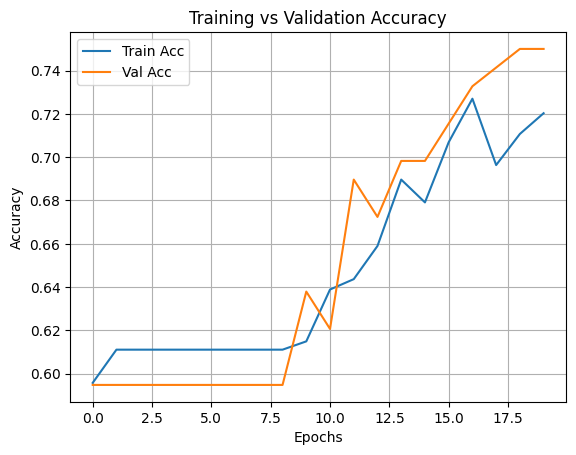

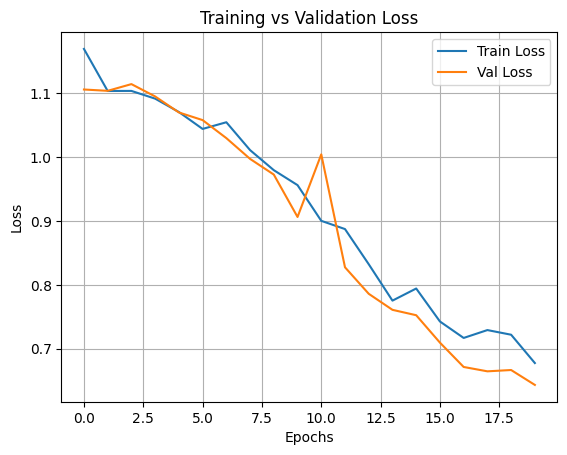

In [21]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


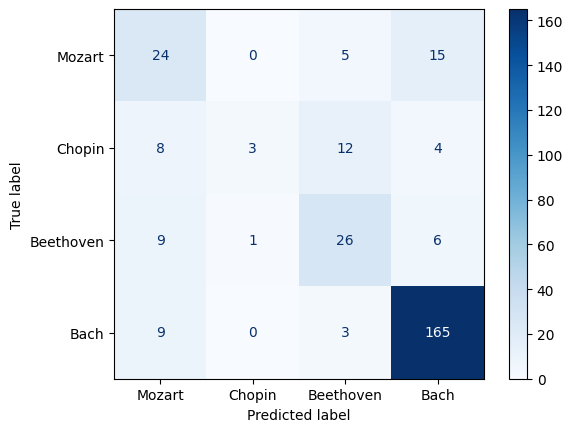

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Mozart", "Chopin", "Beethoven", "Bach"])
disp.plot(cmap="Blues")

it seems data is highly imbalanced

In [23]:
import numpy as np
from collections import Counter
from tqdm import tqdm

def transpose_roll(roll, semitone_shift):
    if semitone_shift == 0:
        return roll
    shifted = np.roll(roll, shift=semitone_shift, axis=0)
    if semitone_shift > 0:
        shifted[:semitone_shift, :] = 0
    else:
        shifted[semitone_shift:, :] = 0
    return shifted

def balance_dataset_with_augmentation(X_raw, y_raw, target_classes=[0, 1, 2, 3], max_shifts=[-2, -1, 1, 2]):
    print("📊 Original class distribution:")
    class_counts = Counter(y_raw)
    for label in sorted(class_counts):
        print(f"  Class {label}: {class_counts[label]} samples")

    max_count = max(class_counts.values())

    X_aug = []
    y_aug = []

    for class_label in sorted(set(y_raw)):
        class_indices = [i for i, y in enumerate(y_raw) if y == class_label]
        class_samples = [X_raw[i] for i in class_indices]

        # Add original samples
        X_aug.extend(class_samples)
        y_aug.extend([class_label] * len(class_samples))

        needed = max_count - len(class_samples)
        if needed <= 0:
            continue  # Already at or above max

        print(f"🔁 Augmenting class {class_label}: need {needed} more samples")

        count = 0
        while count < needed:
            for i in range(len(class_samples)):
                if count >= needed:
                    break
                shift = np.random.choice(max_shifts)
                new_sample = transpose_roll(class_samples[i], shift)
                X_aug.append(new_sample)
                y_aug.append(class_label)
                count += 1

    print("\n✅ Final class distribution after augmentation:")
    new_counts = Counter(y_aug)
    for label in sorted(new_counts):
        print(f"  Class {label}: {new_counts[label]} samples")

    X_aug = np.array(X_aug)[..., np.newaxis]  # Add channel dim
    y_aug = np.array(y_aug)
    return X_aug, y_aug

In [24]:
X_balanced, y_balanced = balance_dataset_with_augmentation(X, y)

📊 Original class distribution:
  Class 0: 219 samples
  Class 1: 136 samples
  Class 2: 211 samples
  Class 3: 884 samples
🔁 Augmenting class 0: need 665 more samples
🔁 Augmenting class 1: need 748 more samples
🔁 Augmenting class 2: need 673 more samples

✅ Final class distribution after augmentation:
  Class 0: 884 samples
  Class 1: 884 samples
  Class 2: 884 samples
  Class 3: 884 samples


In [25]:
# Redefine the model before retraining
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 500, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 249, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 247, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 123, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 121, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,700 (428.52 KB)

 Trainable params: 109,700 (428.52 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

In [27]:
# Add early stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.2808 - loss: 1.3759 - val_accuracy: 0.3074 - val_loss: 1.3433
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.3632 - loss: 1.3235 - val_accuracy: 0.4134 - val_loss: 1.2732
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4124 - loss: 1.2409 - val_accuracy: 0.4205 - val_loss: 1.2343
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4951 - loss: 1.1304 - val_accuracy: 0.5194 - val_loss: 1.0342
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5436 - loss: 1.0068 - val_accuracy: 0.5265 - val_loss: 0.9801
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5481 - loss: 0.9809 - val_accuracy: 0.5795 - val_loss: 1.0075
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5889 - loss: 0.9225 - val_accuracy: 0.5512 - val_loss: 1.0799
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5909 - loss: 0.9382 - val_accuracy: 0.5689 

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {test_acc:.2%}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7102 - loss: 0.7353
🎯 Test Accuracy: 71.19%


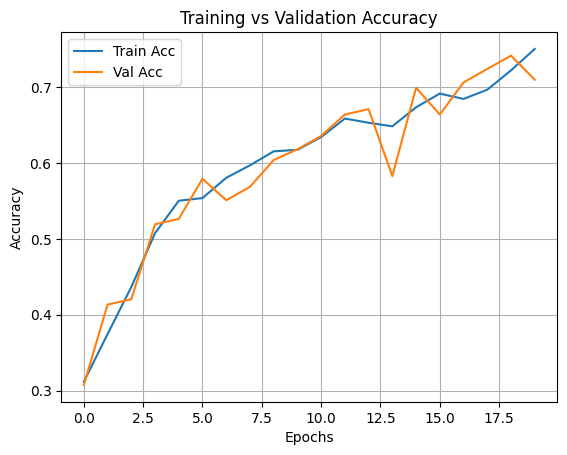

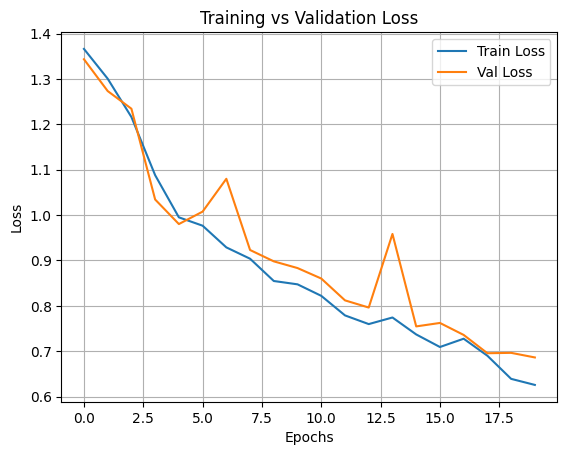

In [29]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


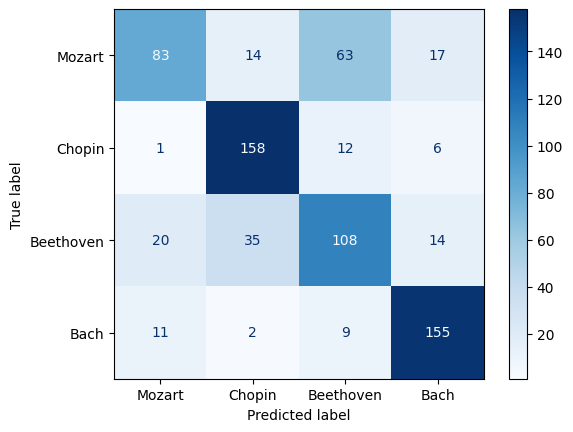

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Mozart", "Chopin", "Beethoven", "Bach"])
disp.plot(cmap="Blues")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Mozart", "Chopin", "Beethoven", "Bach"]))

              precision    recall  f1-score   support

      Mozart       0.72      0.47      0.57       177
      Chopin       0.76      0.89      0.82       177
   Beethoven       0.56      0.61      0.59       177
        Bach       0.81      0.88      0.84       177

    accuracy                           0.71       708
   macro avg       0.71      0.71      0.70       708
weighted avg       0.71      0.71      0.70       708



In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

input_layer = Input(shape=(128, 500, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2), name='max_pooling2d_1')(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_2')(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

x = MaxPooling2D((2, 2), name='max_pooling2d_4')(x)  # Shape: (None, 14, 60, 128) for piano roll input

# 💡 Save this point for extraction:
cnn_features = x  # (14, 60, 128)

# Classification layers
x = GlobalAveragePooling2D()(cnn_features)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

# Final model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 500, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 126, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 249, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 247, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 123, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 121, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 30, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,700 (428.52 KB)

 Trainable params: 109,700 (428.52 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Add early stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2746 - loss: 1.3770 - val_accuracy: 0.3534 - val_loss: 1.3379
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4074 - loss: 1.3156 - val_accuracy: 0.3746 - val_loss: 1.2771
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4088 - loss: 1.2571 - val_accuracy: 0.4028 - val_loss: 1.2194
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4824 - loss: 1.1653 - val_accuracy: 0.4523 - val_loss: 1.1426
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5385 - loss: 0.9860 - val_accuracy: 0.5512 - val_loss: 0.9341
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5390 - loss: 1.0318 - val_accuracy: 0.5618 - val_loss: 0.9232
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6047 - loss: 0.8852 - val_accuracy: 0.5972 - val_loss: 0.8619
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6072 - loss: 0.8785 - val_accuracy: 0.6219 -

In [34]:
feature_extractor = Model(
    inputs=model.input,
    outputs=model.get_layer("max_pooling2d_4").output
)

features = feature_extractor.predict(X_balanced, batch_size=32, verbose=1)
print("Extracted feature shape:", features.shape)  # (samples, 14, 60, 128)

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step
Extracted feature shape: (3536, 7, 30, 128)


In [35]:
X_lstm = features.transpose(0, 2, 1, 3).reshape(features.shape[0], 30, 7 * 128)

print("X_lstm shape:", X_lstm.shape)  # ➞ (3536, 30, 896)

X_lstm shape: (3536, 30, 896)


Need to convert the MIDI files into numerical sequences that the LSTM model can better understand and learn from

In [36]:
def get_notes_at_time(midi_data, time_point):
    """
    Find all notes playing at a specific time point.

    WHY: We need to know what notes are active at each moment to understand
    the musical content. This helps us track melody, harmony, and rhythm.

    Args:
        midi_data: The loaded MIDI file
        time_point: The time (in seconds) we want to check

    Returns:
        List of note pitches playing at that time
    """
    active_notes = []

    # Look through all instruments in the MIDI file
    for instrument in midi_data.instruments:
        # Skip drum tracks (we focus on pitched instruments)
        if instrument.is_drum:
            continue

        # Look through all notes in this instrument
        for note in instrument.notes:
            # Check if this note is playing at our time point
            if note.start <= time_point < note.end:
                active_notes.append(note.pitch)

    return active_notes

In [37]:
def extract_basic_features_from_midi(midi_data):
    """
    Extract simple musical features from a MIDI file.

    WHY EACH FEATURE MATTERS FOR COMPOSER IDENTIFICATION:

    1. PITCH SEQUENCE: Different composers use different melodic patterns
       - Bach: Complex counterpoint, wide ranges
       - Mozart: Elegant, balanced melodies
       - Beethoven: Bold, dramatic pitch movements
       - Chopin: Ornate, flowing melodic lines

    2. NOTE DENSITY: How many notes play simultaneously
       - Bach: Dense, polyphonic textures
       - Chopin: Varied density with accompaniment patterns
       - Classical composers: Different orchestration styles

    3. PITCH RANGE: The span between highest and lowest notes
       - Shows compositional complexity and instrument usage
       - Some composers write in wider ranges than others

    4. RHYTHM PATTERNS: When notes start and stop
       - Each composer has characteristic rhythmic signatures
       - Helps distinguish between musical periods and styles
    """

    # Step 1: Set up time grid
    # WHY: Need consistent time intervals to create sequences for LSTM
    time_step = 0.1  # Check every 0.1 seconds (100 milliseconds)
    total_duration = midi_data.get_end_time()

    print(f"    Processing MIDI file: {total_duration:.2f} seconds long")

    # Create time points from start to end
    time_points = []
    current_time = 0.0
    while current_time < total_duration:
        time_points.append(current_time)
        current_time += time_step

    # Step 2: Initialize the feature lists
    pitch_sequence = []      # Main melody line over time
    note_count_sequence = [] # How many notes at each time point
    pitch_range_sequence = [] # Range between high and low notes

    # Step 3: Extract features at each time point
    print(f"    Analyzing {len(time_points)} time points...")

    for i, time_point in enumerate(time_points):
        # Show progress every 1000 time points
        if i % 1000 == 0 and i > 0:
            print(f"      Processed {i}/{len(time_points)} time points")

        # Get all notes playing at this time
        active_notes = get_notes_at_time(midi_data, time_point)

        if len(active_notes) > 0:
            # FEATURE 1: Primary pitch (highest note - often the melody)
            # WHY: The melody is usually the most characteristic part
            highest_pitch = max(active_notes)
            pitch_sequence.append(highest_pitch)

            # FEATURE 2: Note density (polyphony)
            # WHY: Bach uses more simultaneous notes than Chopin typically
            note_count = len(active_notes)
            note_count_sequence.append(note_count)

            # FEATURE 3: Pitch range at this moment
            # WHY: Shows harmonic complexity and voicing style
            lowest_pitch = min(active_notes)
            pitch_range = highest_pitch - lowest_pitch
            pitch_range_sequence.append(pitch_range)

        else:
            # No notes playing - this is silence
            pitch_sequence.append(0)        # 0 = silence
            note_count_sequence.append(0)   # No notes
            pitch_range_sequence.append(0) # No range

    # Step 4: Calculate additional features

    # TEMPO INFORMATION
    # WHY: Different composers prefer different tempos and tempo stability
    tempo_changes = midi_data.get_tempo_changes()
    if len(tempo_changes[1]) > 0:
        average_tempo = float(np.mean(tempo_changes[1]))
        initial_tempo = float(tempo_changes[1][0])
        tempo_variation = float(np.std(tempo_changes[1])) if len(tempo_changes[1]) > 1 else 0.0
    else:
        average_tempo = 120.0  # Default tempo
        initial_tempo = 120.0
        tempo_variation = 0.0

    # OVERALL STATISTICS
    # WHY: These give us composer "signatures"
    total_notes = 0
    for instrument in midi_data.instruments:
        if not instrument.is_drum:
            total_notes += len(instrument.notes)

    # Calculate average values
    avg_pitch = float(np.mean([p for p in pitch_sequence if p > 0])) if any(p > 0 for p in pitch_sequence) else 0.0
    avg_note_density = float(np.mean(note_count_sequence))
    max_simultaneous_notes = float(max(note_count_sequence)) if note_count_sequence else 0.0

    # Step 5: Package all features together
    features = {
        # Time series features (for LSTM input)
        'pitch_sequence': pitch_sequence,
        'note_density_sequence': note_count_sequence,
        'pitch_range_sequence': pitch_range_sequence,

        # Summary statistics
        'total_duration': float(total_duration),
        'sequence_length': len(pitch_sequence),
        'total_notes': total_notes,
        'average_tempo': average_tempo,
        'initial_tempo': initial_tempo,
        'tempo_variation': tempo_variation,
        'average_pitch': avg_pitch,
        'average_note_density': avg_note_density,
        'max_simultaneous_notes': max_simultaneous_notes,

        # File info
        'num_instruments': len([inst for inst in midi_data.instruments if not inst.is_drum])
    }

    return features

In [38]:
def process_one_composer(midi_dictionary, composer_name):
    """
    Extract features from all MIDI files for one composer.

    Args:
        midi_dictionary: Dictionary containing MIDI files (like mozart_midi_data)
        composer_name: Name of composer (like "Mozart")

    Returns:
        List of feature dictionaries, one for each MIDI file
    """
    print(f"\n--- Processing {composer_name} ---")
    print(f"Found {len(midi_dictionary)} MIDI files for {composer_name}")

    composer_features = []
    successful_files = 0
    failed_files = 0

    # Process each MIDI file
    for filename, midi_data in midi_dictionary.items():
        print(f"  Processing: {filename}")

        try:
            # Extract features from this MIDI file
            features = extract_basic_features_from_midi(midi_data)

            # Add composer label and filename
            features['composer'] = composer_name
            features['filename'] = filename

            # Add to the list
            composer_features.append(features)
            successful_files += 1

        except Exception as error:
            print(f"    ERROR processing {filename}: {error}")
            failed_files += 1
            continue

    print(f"  ✓ Successfully processed: {successful_files} files")
    if failed_files > 0:
        print(f"  ✗ Failed to process: {failed_files} files")

    return composer_features

In [39]:
def extract_features_from_all_composers():
    """
    Main function to extract features from all four composers.

    This function will use the MIDI dictionaries:
    - mozart_midi_data
    - chopin_midi_data
    - beethoven_midi_data
    - bach_midi_data

    Returns:
        List containing features from all MIDI files
    """
    print("=== STARTING FEATURE EXTRACTION ===")
    print("This will convert MIDI files into numerical features for machine learning")
    print()

    all_features = []

    # Process each composer one by one
    # WHY THIS ORDER: Start with smaller datasets to test, then process Bach (largest)

    # 1. Mozart (219 files)
    mozart_features = process_one_composer(mozart_midi_data, "Mozart")
    all_features.extend(mozart_features)

    # 2. Chopin (136 files)
    chopin_features = process_one_composer(chopin_midi_data, "Chopin")
    all_features.extend(chopin_features)

    # 3. Beethoven (211 files)
    beethoven_features = process_one_composer(beethoven_midi_data, "Beethoven")
    all_features.extend(beethoven_features)

    # 4. Bach (876 files) - largest dataset
    bach_features = process_one_composer(bach_midi_data, "Bach")
    all_features.extend(bach_features)

    # Print final summary
    print(f"\n=== FEATURE EXTRACTION COMPLETE ===")
    print(f"Total files processed: {len(all_features)}")

    # Count by composer
    for composer in ["Mozart", "Chopin", "Beethoven", "Bach"]:
        count = sum(1 for f in all_features if f['composer'] == composer)
        print(f"  {composer}: {count} files")

    return all_features

In [40]:
# Run the feature extraction
print("Starting feature extraction process...")
print()

# Extract features from all composers
all_extracted_features = extract_features_from_all_composers()

Streaming output truncated to the last 5000 lines.
    Processing MIDI file: 441.00 seconds long
    Analyzing 4411 time points...
      Processed 1000/4411 time points
      Processed 2000/4411 time points
      Processed 3000/4411 time points
      Processed 4000/4411 time points
  Processing: Overture_InaugurationoftheHouse_op214.mid
    Processing MIDI file: 641.75 seconds long
    Analyzing 6418 time points...
      Processed 1000/6418 time points
      Processed 2000/6418 time points
      Processed 3000/6418 time points
      Processed 4000/6418 time points
      Processed 5000/6418 time points
      Processed 6000/6418 time points
  Processing: Bagatellaop33n3.mid
    Processing MIDI file: 99.58 seconds long
    Analyzing 996 time points...
  Processing: Bagatellaop33n1.mid
    Processing MIDI file: 204.81 seconds long
    Analyzing 2049 time points...
      Processed 1000/2049 time points
      Processed 2000/2049 time points
  Processing: PianoConcerton5op732-3mov_Emperor_.mi

In [41]:
# examine and analyze results
if len(all_extracted_features) > 0:
    # Look at first file as an example
    sample_features = all_extracted_features[0]

    print(f"\nExample: Features from '{sample_features['filename']}'")
    print(f"Composer: {sample_features['composer']}")
    print(f"Duration: {sample_features['total_duration']:.2f} seconds")
    print(f"Sequence length: {sample_features['sequence_length']} time steps")
    print(f"Total notes: {sample_features['total_notes']}")
    print(f"Average tempo: {sample_features['average_tempo']:.1f} BPM")
    print(f"Average pitch: {sample_features['average_pitch']:.1f}")
    print(f"Max simultaneous notes: {sample_features['max_simultaneous_notes']:.1f}")

    # Show first few values of the sequences
    print(f"\nFirst 10 pitch values: {sample_features['pitch_sequence'][:10]}")
    print(f"First 10 note density values: {sample_features['note_density_sequence'][:10]}")

    # Calculate some statistics across all files
    print("DATASET STATISTICS")

    # Sequence lengths
    sequence_lengths = [f['sequence_length'] for f in all_extracted_features]
    print(f"Sequence lengths - Min: {min(sequence_lengths)}, Max: {max(sequence_lengths)}, Average: {np.mean(sequence_lengths):.1f}")

    # Duration statistics
    durations = [f['total_duration'] for f in all_extracted_features]
    print(f"File durations - Min: {min(durations):.1f}s, Max: {max(durations):.1f}s, Average: {np.mean(durations):.1f}s")

    # Note density by composer
    print(f"\nAverage note density by composer:")
    for composer in ["Mozart", "Chopin", "Beethoven", "Bach"]:
        composer_files = [f for f in all_extracted_features if f['composer'] == composer]
        if composer_files:
            avg_density = np.mean([f['average_note_density'] for f in composer_files])
            print(f"  {composer}: {avg_density:.2f} notes/time")

print(f"\n✓ Feature extraction complete!")
print(f"Features are stored in 'all_extracted_features' variable.")


Example: Features from 'K626Requiem04DiesIrae.mid'
Composer: Mozart
Duration: 111.08 seconds
Sequence length: 1111 time steps
Total notes: 5458
Average tempo: 151.0 BPM
Average pitch: 74.0
Max simultaneous notes: 18.0

First 10 pitch values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 note density values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DATASET STATISTICS
Sequence lengths - Min: 176, Max: 52094, Average: 2438.7
File durations - Min: 17.5s, Max: 5209.3s, Average: 243.8s

Average note density by composer:
  Mozart: 4.52 notes/time
  Chopin: 3.03 notes/time
  Beethoven: 3.92 notes/time
  Bach: 4.04 notes/time

✓ Feature extraction complete!
Features are stored in 'all_extracted_features' variable.


# Additional Feature Engineering

In [42]:
# Balance the dataset
def time_window_augmentation(features, window_size=100, overlap=0.5):
    """
    Create multiple samples by sliding a window over long sequences.

    WHY: This is the most effective augmentation technique because:
    - Creates many samples from one long piece
    - Preserves musical structure completely
    - Works perfectly with any composer's style
    - Increases dataset size dramatically

    Args:
        features: Dictionary containing the extracted features
        window_size: Number of time steps in each window (100 = 10 seconds)
        overlap: How much windows overlap (0.5 = 50% overlap)

    Returns:
        List of new feature dictionaries, each with a shorter sequence
    """

    # Get the main sequences from the features
    pitch_sequence = features['pitch_sequence']
    note_density_sequence = features['note_density_sequence']
    pitch_range_sequence = features['pitch_range_sequence']

    # Only process if sequence is long enough
    if len(pitch_sequence) < window_size:
        return [features]  # Return original if too short

    augmented_samples = []
    step_size = int(window_size * (1 - overlap))  # How far to move window each time

    # Slide the window across the sequence
    for start_idx in range(0, len(pitch_sequence) - window_size + 1, step_size):
        end_idx = start_idx + window_size

        # Create new sample with windowed sequences
        new_sample = copy.deepcopy(features)  # Copy all the original data

        # Replace sequences with windowed versions
        new_sample['pitch_sequence'] = pitch_sequence[start_idx:end_idx]
        new_sample['note_density_sequence'] = note_density_sequence[start_idx:end_idx]
        new_sample['pitch_range_sequence'] = pitch_range_sequence[start_idx:end_idx]

        # Update metadata
        new_sample['sequence_length'] = window_size
        new_sample['total_duration'] = float(window_size * 0.1)  # 0.1 seconds per time step
        new_sample['filename'] = f"{features['filename']}_window_{start_idx}"

        augmented_samples.append(new_sample)

    return augmented_samples

In [43]:
def pitch_shift_augmentation(features, shift_amount):
    """
    Transpose all pitches up or down by a fixed amount.

    WHY: Musical pieces sound the same in different keys:
    - Preserves the relative relationships between notes
    - Very common in music (performers play in different keys)
    - Doesn't change the composer's style

    Args:
        features: Dictionary containing the extracted features
        shift_amount: Number of semitones to shift (positive = higher, negative = lower)

    Returns:
        New feature dictionary with shifted pitches
    """
    new_sample = copy.deepcopy(features)

    # Shift all pitches (but not the zeros, which represent silence)
    new_pitch_sequence = []
    for pitch in features['pitch_sequence']:
        if pitch == 0:  # Silence stays silence
            new_pitch_sequence.append(0)
        else:
            # Shift the pitch, but keep it in reasonable range (21-108 = piano range)
            new_pitch = pitch + shift_amount
            if 21 <= new_pitch <= 108:  # Valid piano range
                new_pitch_sequence.append(new_pitch)
            else:
                new_pitch_sequence.append(pitch)  # Keep original if out of range

    new_sample['pitch_sequence'] = new_pitch_sequence
    new_sample['filename'] = f"{features['filename']}_pitch_shift_{shift_amount}"

    # Update average pitch
    non_zero_pitches = [p for p in new_pitch_sequence if p > 0]
    if non_zero_pitches:
        new_sample['average_pitch'] = float(np.mean(non_zero_pitches))

    return new_sample

In [44]:
def tempo_scaling_augmentation(features, scale_factor):
    """
    Change the speed of the music by resampling the sequences.

    WHY: Same piece can be played at different tempos:
    - Faster tempo = compress the sequence
    - Slower tempo = stretch the sequence
    - Preserves musical patterns at different speeds

    Args:
        features: Dictionary containing the extracted features
        scale_factor: Speed multiplier (2.0 = twice as fast, 0.5 = half speed)

    Returns:
        New feature dictionary with tempo-scaled sequences
    """
    new_sample = copy.deepcopy(features)

    # Get original sequences
    pitch_seq = features['pitch_sequence']
    density_seq = features['note_density_sequence']
    range_seq = features['pitch_range_sequence']

    original_length = len(pitch_seq)
    new_length = int(original_length / scale_factor)

    # Don't make sequences too short
    if new_length < 10:
        return features  # Return original if would be too short

    # Resample sequences to new length
    # Create indices for resampling
    original_indices = np.linspace(0, original_length - 1, original_length)
    new_indices = np.linspace(0, original_length - 1, new_length)

    # Simple nearest-neighbor resampling
    new_pitch_sequence = []
    new_density_sequence = []
    new_range_sequence = []

    for new_idx in new_indices:
        # Find closest original index
        closest_original_idx = int(round(new_idx))
        if closest_original_idx >= original_length:
            closest_original_idx = original_length - 1

        new_pitch_sequence.append(pitch_seq[closest_original_idx])
        new_density_sequence.append(density_seq[closest_original_idx])
        new_range_sequence.append(range_seq[closest_original_idx])

    # Update the sample
    new_sample['pitch_sequence'] = new_pitch_sequence
    new_sample['note_density_sequence'] = new_density_sequence
    new_sample['pitch_range_sequence'] = new_range_sequence
    new_sample['sequence_length'] = new_length
    new_sample['total_duration'] = float(new_length * 0.1)
    new_sample['filename'] = f"{features['filename']}_tempo_{scale_factor}"

    # Update tempo-related features
    new_sample['average_tempo'] = features['average_tempo'] * scale_factor
    new_sample['initial_tempo'] = features['initial_tempo'] * scale_factor

    return new_sample

In [46]:
def velocity_scaling_augmentation(features, scale_factor):
    """
    Scale the note density (volume/intensity) by a constant factor.

    WHY: Same piece can be played at different volumes:
    - Softer playing vs louder playing
    - Different performance interpretations
    - Preserves relative dynamics

    Args:
        features: Dictionary containing the extracted features
        scale_factor: Volume multiplier (1.5 = louder, 0.7 = softer)

    Returns:
        New feature dictionary with scaled note densities
    """
    new_sample = copy.deepcopy(features)

    # Scale note density sequence (represents how many notes playing)
    scaled_density = [density * scale_factor for density in features['note_density_sequence']]

    new_sample['note_density_sequence'] = scaled_density
    new_sample['average_note_density'] = features['average_note_density'] * scale_factor
    new_sample['max_simultaneous_notes'] = features['max_simultaneous_notes'] * scale_factor
    new_sample['filename'] = f"{features['filename']}_velocity_{scale_factor}"

    return new_sample

In [47]:
def augment_composer_data(composer_features, target_count, composer_name):
    """
    Augment a single composer's data to reach target count.

    Args:
        composer_features: List of feature dictionaries for one composer
        target_count: How many samples we want total
        composer_name: Name of composer (for progress updates)

    Returns:
        List of augmented features (original + generated)
    """
    current_count = len(composer_features)

    if current_count >= target_count:
        print(f"  {composer_name}: Already has {current_count} files, no augmentation needed")
        return composer_features[:target_count]  # Just return the target amount

    needed_count = target_count - current_count
    print(f"  {composer_name}: Augmenting from {current_count} to {target_count} files ({needed_count} new samples needed)")

    augmented_data = composer_features.copy()  # Start with originals

    # Define augmentation strategies in order of preference
    augmentation_techniques = [
        # Technique, probability of use, parameters
        ('time_window', 0.4, {'window_size': 150, 'overlap': 0.3}),   # Most samples
        ('time_window', 0.3, {'window_size': 100, 'overlap': 0.5}),   # Different window size
        ('pitch_shift', 0.1, {'shift_amounts': [2, 3, 4, -2, -3, -4]}), # Different keys
        ('tempo_scaling', 0.1, {'scale_factors': [1.2, 1.3, 0.8, 0.9]}), # Different speeds
        ('velocity_scaling', 0.1, {'scale_factors': [1.3, 1.5, 0.7, 0.8]}) # Different volumes
    ]

    # Keep generating until we have enough samples
    attempts = 0
    max_attempts = needed_count * 3  # Prevent infinite loops

    while len(augmented_data) < target_count and attempts < max_attempts:
        # Pick a random original sample to augment
        original_sample = random.choice(composer_features)

        # Pick augmentation technique based on probabilities
        rand_val = random.random()
        cumulative_prob = 0

        for technique, prob, params in augmentation_techniques:
            cumulative_prob += prob
            if rand_val <= cumulative_prob:

                if technique == 'time_window':
                    new_samples = time_window_augmentation(original_sample, **params)
                    # Add all windowed samples
                    for new_sample in new_samples:
                        if len(augmented_data) < target_count:
                            augmented_data.append(new_sample)

                elif technique == 'pitch_shift':
                    shift_amount = random.choice(params['shift_amounts'])
                    new_sample = pitch_shift_augmentation(original_sample, shift_amount)
                    augmented_data.append(new_sample)

                elif technique == 'tempo_scaling':
                    scale_factor = random.choice(params['scale_factors'])
                    new_sample = tempo_scaling_augmentation(original_sample, scale_factor)
                    augmented_data.append(new_sample)

                elif technique == 'velocity_scaling':
                    scale_factor = random.choice(params['scale_factors'])
                    new_sample = velocity_scaling_augmentation(original_sample, scale_factor)
                    augmented_data.append(new_sample)

                break

        attempts += 1

    # Trim to exact target count if we generated too many
    final_data = augmented_data[:target_count]

    print(f"    ✓ Generated {len(final_data) - current_count} new samples")
    return final_data

In [48]:
def balance_dataset(all_extracted_features, target_samples_per_composer=450):
    """
    Balance the entire dataset by augmenting underrepresented composers.

    Args:
        all_extracted_features: List of all feature dictionaries
        target_samples_per_composer: How many samples each composer should have

    Returns:
        Balanced list of feature dictionaries
    """
    print("BALANCING DATASET WITH FEATURE ENGINEERING")
    print(f"Target: {target_samples_per_composer} samples per composer")
    print()

    # Separate features by composer
    composers_data = {
        'Mozart': [],
        'Chopin': [],
        'Beethoven': [],
        'Bach': []
    }

    for features in all_extracted_features:
        composer = features['composer']
        composers_data[composer].append(features)

    # Show current distribution
    print("Current distribution:")
    for composer, features_list in composers_data.items():
        print(f"  {composer}: {len(features_list)} files")
    print()

    # Augment each composer's data
    balanced_data = []

    for composer, features_list in composers_data.items():
        augmented_features = augment_composer_data(
            features_list,
            target_samples_per_composer,
            composer
        )
        balanced_data.extend(augmented_features)

    # Shuffle the balanced dataset
    random.shuffle(balanced_data)

    # Show final distribution
    print(f"AUGMENTATION COMPLETE")
    print(f"Total samples: {len(balanced_data)}")
    print("Final distribution:")

    final_counts = {'Mozart': 0, 'Chopin': 0, 'Beethoven': 0, 'Bach': 0}
    for features in balanced_data:
        final_counts[features['composer']] += 1

    for composer, count in final_counts.items():
        print(f"  {composer}: {count} files ({count/len(balanced_data)*100:.1f}%)")

    return balanced_data

In [49]:
import numpy as np
import random
import copy

In [50]:
# Run all the feature engineering functions
print("Starting feature engineering to balance the dataset...")
print("This will create additional training samples to improve LSTM performance.")
print()

# Balance the dataset (using your extracted features)
balanced_features = balance_dataset(all_extracted_features, target_samples_per_composer=400)

Starting feature engineering to balance the dataset...
This will create additional training samples to improve LSTM performance.

BALANCING DATASET WITH FEATURE ENGINEERING
Target: 400 samples per composer

Current distribution:
  Mozart: 219 files
  Chopin: 136 files
  Beethoven: 211 files
  Bach: 884 files

  Mozart: Augmenting from 219 to 400 files (181 new samples needed)
    ✓ Generated 181 new samples
  Chopin: Augmenting from 136 to 400 files (264 new samples needed)
    ✓ Generated 264 new samples
  Beethoven: Augmenting from 211 to 400 files (189 new samples needed)
    ✓ Generated 189 new samples
  Bach: Already has 884 files, no augmentation needed
AUGMENTATION COMPLETE
Total samples: 1600
Final distribution:
  Mozart: 400 files (25.0%)
  Chopin: 400 files (25.0%)
  Beethoven: 400 files (25.0%)
  Bach: 400 files (25.0%)


In [51]:
# See results
# Show a few examples of augmented data
print(f"\nExample augmented filenames:")
example_count = 0
for features in balanced_features:
    if 'window_' in features['filename'] or 'pitch_shift_' in features['filename'] or 'tempo_' in features['filename']:
        print(f"  Original: {features['filename'].split('_window_')[0].split('_pitch_shift_')[0].split('_tempo_')[0]}")
        print(f"  Augmented: {features['filename']}")
        print(f"  Composer: {features['composer']}")
        print()
        example_count += 1
        if example_count >= 3:
            break

# Check sequence length distribution
sequence_lengths = [len(f['pitch_sequence']) for f in balanced_features]
print(f"Sequence length statistics:")
print(f"  Min: {min(sequence_lengths)} time steps")
print(f"  Max: {max(sequence_lengths)} time steps")
print(f"  Average: {np.mean(sequence_lengths):.1f} time steps")
print(f"  Most common: {max(set(sequence_lengths), key=sequence_lengths.count)} time steps")

print(f"\n✓ Dataset is now balanced and ready for LSTM training!")
print(f"There are now {len(balanced_features)} total training samples.")


Example augmented filenames:
  Original: Symphonyop125n92mov_Choral_.mid
  Augmented: Symphonyop125n92mov_Choral_.mid_window_5150
  Composer: Beethoven

  Original: Symphonyn25K1832mov.mid
  Augmented: Symphonyn25K1832mov.mid_window_315
  Composer: Mozart

  Original: Preluden02op28_PresentimentofDeath_.mid
  Augmented: Preluden02op28_PresentimentofDeath_.mid_window_100
  Composer: Chopin

Sequence length statistics:
  Min: 100 time steps
  Max: 52094 time steps
  Average: 2067.3 time steps
  Most common: 100 time steps

✓ Dataset is now balanced and ready for LSTM training!
There are now 1600 total training samples.


# LSTM Model Training & Evaluation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

Why is an LSTM model good for composer classification?


1.   Music is sequential - notes depend on what came before
2.   Temporal patterns - composers have signature rhythmic/melodic patterns
3.   Long-term memory - musical phrases span many time steps
4.   Context matters - the same note sequence means different things in different contexts




In [53]:
def prepare_sequences_for_lstm(balanced_features, max_sequence_length=150):
    """
    Convert our extracted features into sequences suitable for LSTM training.

    WHY PADDING IS NEEDED:
    - LSTM requires all input sequences to be the same length
    - Pad shorter sequences with zeros
    - Truncate longer sequences to max_length

    Args:
        balanced_features: List of feature dictionaries from augmentation
        max_sequence_length: Maximum length for all sequences

    Returns:
        X: Input sequences for LSTM (samples, time_steps, features)
        y: Target labels (composer names)
        feature_names: Names of the features we're using
    """
    print("PREPARING DATA FOR LSTM")
    print(f"Converting {len(balanced_features)} samples into LSTM-ready format...")

    # Use these 3 time-series features as input to LSTM
    feature_names = ['pitch_sequence', 'note_density_sequence', 'pitch_range_sequence']

    X = []  # Input sequences
    y = []  # Composer labels

    for i, features in enumerate(balanced_features):
        if i % 200 == 0:
            print(f"  Processing sample {i}/{len(balanced_features)}...")

        # Get the three sequences
        pitch_seq = features['pitch_sequence']
        density_seq = features['note_density_sequence']
        range_seq = features['pitch_range_sequence']

        # Make sure all sequences are the same length
        seq_length = len(pitch_seq)

        # Truncate if too long
        if seq_length > max_sequence_length:
            pitch_seq = pitch_seq[:max_sequence_length]
            density_seq = density_seq[:max_sequence_length]
            range_seq = range_seq[:max_sequence_length]
            seq_length = max_sequence_length

        # Pad if too short
        if seq_length < max_sequence_length:
            padding_needed = max_sequence_length - seq_length
            pitch_seq.extend([0] * padding_needed)
            density_seq.extend([0] * padding_needed)
            range_seq.extend([0] * padding_needed)

        # Combine the three sequences into one multi-feature sequence
        # Shape will be (time_steps, num_features) = (max_sequence_length, 3)
        combined_sequence = []
        for t in range(max_sequence_length):
            time_step_features = [
                pitch_seq[t],      # Feature 1: Pitch at time t
                density_seq[t],    # Feature 2: Note density at time t
                range_seq[t]       # Feature 3: Pitch range at time t
            ]
            combined_sequence.append(time_step_features)

        X.append(combined_sequence)
        y.append(features['composer'])

    # Convert to numpy arrays
    X = np.array(X)  # Shape: (num_samples, max_sequence_length, 3)
    y = np.array(y)  # Shape: (num_samples,)

    print(f"  ✓ Prepared {len(X)} sequences")
    print(f"  ✓ Input shape: {X.shape} (samples, time_steps, features)")
    print(f"  ✓ Each sequence has {X.shape[1]} time steps with {X.shape[2]} features")

    return X, y, feature_names

In [54]:
def normalize_features(X_train, X_val, X_test):
    """
    Normalize the input features for better LSTM training.

    WHY NORMALIZATION IS IMPORTANT:
    - Pitch values (0-127) are much larger than density values (0-10)
    - LSTM trains better when all features are on similar scales
    - Prevents one feature from dominating the learning

    Args:
        X_train, X_val, X_test: Training, validation, and test sequences

    Returns:
        Normalized versions of the input arrays + the scaler
    """
    print("NORMALIZING FEATURES")

    # Reshape for scaling: (samples * time_steps, features)
    original_shape_train = X_train.shape
    original_shape_val = X_val.shape
    original_shape_test = X_test.shape

    X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
    X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
    X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

    # Fit scaler on training data only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_val_scaled = scaler.transform(X_val_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)

    # Reshape back to original sequence format
    X_train_normalized = X_train_scaled.reshape(original_shape_train)
    X_val_normalized = X_val_scaled.reshape(original_shape_val)
    X_test_normalized = X_test_scaled.reshape(original_shape_test)

    print(f"  ✓ Normalized features using StandardScaler")
    print(f"  ✓ Training data shape: {X_train_normalized.shape}")

    return X_train_normalized, X_val_normalized, X_test_normalized, scaler

In [55]:
def prepare_labels(y_train, y_val, y_test):
    """
    Convert composer names to numbers that model can use.

    WHY THIS IS NEEDED:
    - Neural networks need numerical labels, not text
    - We convert: 'Mozart' -> 0, 'Chopin' -> 1, etc.
    - Then convert to one-hot encoding for multi-class classification

    Args:
        y_train, y_val, y_test: Arrays of composer names

    Returns:
        One-hot encoded labels + label encoder for later use
    """
    print("PREPARING LABELS")

    # Convert composer names to numbers
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to one-hot encoding
    num_classes = len(label_encoder.classes_)
    y_train_onehot = to_categorical(y_train_encoded, num_classes)
    y_val_onehot = to_categorical(y_val_encoded, num_classes)
    y_test_onehot = to_categorical(y_test_encoded, num_classes)

    print(f"  ✓ Encoded {num_classes} composers: {list(label_encoder.classes_)}")
    print(f"  ✓ Label encoding: {dict(zip(label_encoder.classes_, range(num_classes)))}")
    print(f"  ✓ One-hot shape: {y_train_onehot.shape}")

    return y_train_onehot, y_val_onehot, y_test_onehot, label_encoder

In [56]:
def build_lstm_model(input_shape, num_classes):
    """
    Build the LSTM architecture:
    1. LSTM Layer 1: Learns temporal patterns in music (128 units)
    2. Dropout: Prevents overfitting (20% of neurons randomly turned off)
    3. LSTM Layer 2: Learns higher-level patterns (64 units)
    4. Dropout: More regularization
    5. Dense Layer: Combines patterns for classification (32 units)
    6. Output Layer: Final prediction (4 units for 4 composers)

    WHY THIS ARCHITECTURE:
    - Two LSTM layers capture both short and long-term patterns
    - Dropout prevents the model from memorizing training data
    - Dense layer allows complex decision boundaries
    - return_sequences=True passes all time steps to next layer

    Args:
        input_shape: Shape of input sequences (time_steps, features)
        num_classes: Number of composers to classify

    Returns:
        Compiled Keras model ready for training
    """
    print(f"BUILDING LSTM MODEL")
    print(f"Input shape: {input_shape}")
    print(f"Number of classes: {num_classes}")

    model = Sequential()

    # First LSTM layer - learns basic temporal patterns
    model.add(LSTM(128,
                   return_sequences=True,  # Pass sequences to next layer
                   input_shape=input_shape,
                   dropout=0.2,           # Dropout within LSTM
                   recurrent_dropout=0.2)) # Dropout on recurrent connections

    # Batch normalization - helps training stability
    model.add(BatchNormalization())

    # Second LSTM layer - learns higher-level patterns
    model.add(LSTM(64,
                   return_sequences=False,  # Only output final state
                   dropout=0.2,
                   recurrent_dropout=0.2))

    # Dropout for regularization
    model.add(Dropout(0.3))

    # Dense layer for learning complex combinations
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer - one neuron per composer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Good default learning rate
        loss='categorical_crossentropy',       # Standard for multi-class
        metrics=['accuracy']                   # Track accuracy during training
    )

    print("  ✓ Model architecture:")
    model.summary()

    return model

In [57]:
def train_lstm_model(model, X_train, y_train, X_val, y_val):
    """
    Train the LSTM model with monitoring and early stopping.

    TRAINING STRATEGY:
    - Early Stopping: Stop if validation accuracy doesn't improve
    - Learning Rate Reduction: Lower learning rate if stuck
    - Validation Split: Monitor performance on unseen data

    Args:
        model: Compiled Keras model
        X_train, y_train: Training data and labels
        X_val, y_val: Validation data and labels

    Returns:
        Trained model + training history for plotting
    """
    print(f"TRAINING LSTM MODEL")

    # Define callbacks for better training
    callbacks = [
        # Stop training if validation accuracy doesn't improve for 30 epochs
        EarlyStopping(
            monitor='val_accuracy',
            patience=30,
            restore_best_weights=True,
            verbose=1
        ),

        # Reduce learning rate if validation loss plateaus
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=0.0001,
            verbose=1
        )
    ]

    print(f"  Training on {len(X_train)} samples")
    print(f"  Validating on {len(X_val)} samples")
    print(f"  Using early stopping and learning rate reduction")

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=32,              # Process 32 samples at a time
        epochs=100,                 # Maximum 100 epochs
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1                   # Show training progress
    )

    print(f"  ✓ Training completed!")
    return model, history

In [58]:
def evaluate_model(model, X_test, y_test, label_encoder):
    """
    Evaluate the trained model and show detailed performance metrics.

    Args:
        model: Trained model
        X_test, y_test: Test data and labels
        label_encoder: For converting predictions back to composer names

    Returns:
        Test accuracy and detailed classification report
    """
    print(f"EVALUATING MODEL PERFORMANCE")

    # Make predictions
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    test_accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"  ✓ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Detailed classification report
    composer_names = label_encoder.classes_
    print(f"\n  Detailed Performance by Composer:")
    print(classification_report(true_classes, predicted_classes,
                              target_names=composer_names, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=composer_names, yticklabels=composer_names)
    plt.title('Confusion Matrix - Composer Classification')
    plt.xlabel('Predicted Composer')
    plt.ylabel('True Composer')
    plt.tight_layout()
    plt.show()

    return test_accuracy

In [59]:
def plot_training_history(history):
    """
    Plot training and validation accuracy/loss over time.

    Args:
        history: Training history from model.fit()
    """
    print(f"TRAINING HISTORY")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy Over Time')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss Over Time')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

=== STARTING LSTM MODEL TRAINING ===
This will build and train a LSTM model to classify composers

Step 1: Converting features to LSTM format...
PREPARING DATA FOR LSTM
Converting 1600 samples into LSTM-ready format...
  Processing sample 0/1600...
  Processing sample 200/1600...
  Processing sample 400/1600...
  Processing sample 600/1600...
  Processing sample 800/1600...
  Processing sample 1000/1600...
  Processing sample 1200/1600...
  Processing sample 1400/1600...
  ✓ Prepared 1600 sequences
  ✓ Input shape: (1600, 150, 3) (samples, time_steps, features)
  ✓ Each sequence has 150 time steps with 3 features

Step 2: Splitting data...
  ✓ Training set: 960 samples
  ✓ Validation set: 320 samples
  ✓ Test set: 320 samples
NORMALIZING FEATURES
  ✓ Normalized features using StandardScaler
  ✓ Training data shape: (960, 150, 3)
PREPARING LABELS
  ✓ Encoded 4 composers: [np.str_('Bach'), np.str_('Beethoven'), np.str_('Chopin'), np.str_('Mozart')]
  ✓ Label encoding: {np.str_('Bach'): 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 128)       │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,716 (467.64 KB)

 Trainable params: 119,460 (466.64 KB)

 Non-trainable params: 256 (1.00 KB)

TRAINING LSTM MODEL
  Training on 960 samples
  Validating on 320 samples
  Using early stopping and learning rate reduction
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 588ms/step - accuracy: 0.3026 - loss: 1.4094 - val_accuracy: 0.3625 - val_loss: 1.3201 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 616ms/step - accuracy: 0.3703 - loss: 1.3144 - val_accuracy: 0.3500 - val_loss: 1.2987 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 602ms/step - accuracy: 0.3440 - loss: 1.3285 - val_accuracy: 0.3625 - val_loss: 1.2898 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step - accuracy: 0.3640 - loss: 1.3090 - val_accuracy: 0.3562 - val_loss: 1.2792 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.3707 - loss: 1.2718 - val_accuracy: 0.3531 - val_loss: 1.2688 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 602ms/step - accuracy: 0.3297 - loss: 1.3069 - val_accuracy: 0

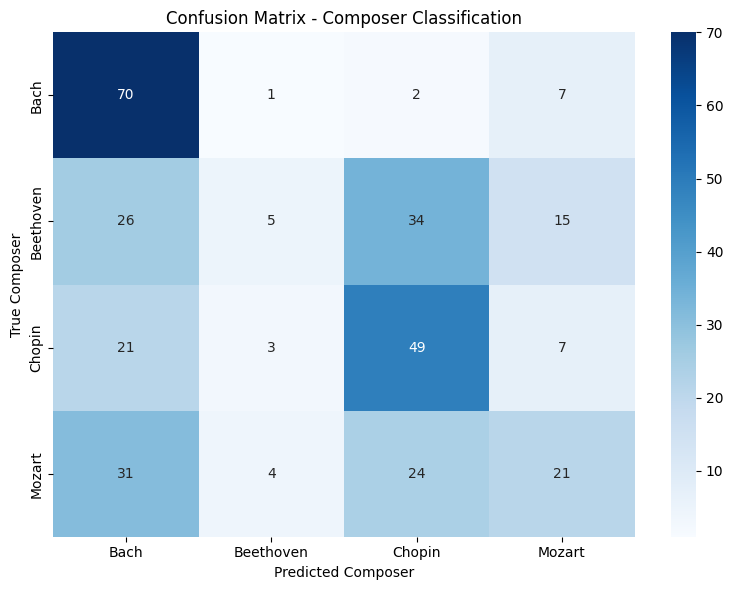

TRAINING HISTORY


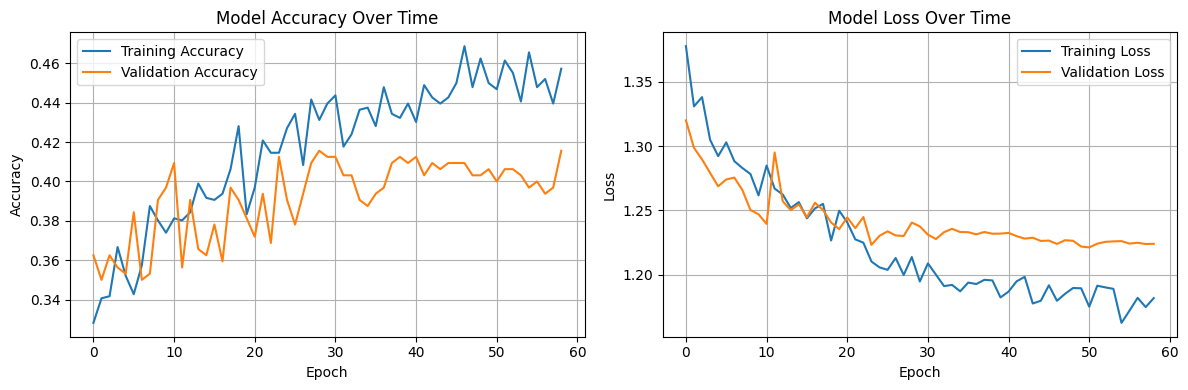

In [60]:
# Run the training pipeline built above

print("=== STARTING LSTM MODEL TRAINING ===")
print("This will build and train a LSTM model to classify composers")
print()

# Step 1: Prepare sequences for LSTM
print("Step 1: Converting features to LSTM format...")
X, y, feature_names = prepare_sequences_for_lstm(balanced_features, max_sequence_length=150)

# Step 2: Split into train/validation/test sets
print(f"\nStep 2: Splitting data...")
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2,
                                                  stratify=y, random_state=42)
# Second split: 75% train, 25% validation (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25,
                                                  stratify=y_temp, random_state=42)

print(f"  ✓ Training set: {len(X_train)} samples")
print(f"  ✓ Validation set: {len(X_val)} samples")
print(f"  ✓ Test set: {len(X_test)} samples")

# Step 3: Normalize features
X_train_norm, X_val_norm, X_test_norm, scaler = normalize_features(X_train, X_val, X_test)

# Step 4: Prepare labels
y_train_encoded, y_val_encoded, y_test_encoded, label_encoder = prepare_labels(y_train, y_val, y_test)

# Step 5: Build model
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])  # (time_steps, features)
num_classes = len(label_encoder.classes_)
model = build_lstm_model(input_shape, num_classes)

# Step 6: Train model
trained_model, training_history = train_lstm_model(
    model, X_train_norm, y_train_encoded, X_val_norm, y_val_encoded
)

# Step 7: Evaluate performance
test_accuracy = evaluate_model(trained_model, X_test_norm, y_test_encoded, label_encoder)

# Step 8: Plot training progress
plot_training_history(training_history)

In [ ]:
# Trying different optimization / enhancements to improve model performance:
# 1. Longer sequences: 150 → 200 time steps (more musical context)
# 2. Bidirectional LSTM: Reads music forward AND backward
# 3. Deeper architecture: More layers to learn complex patterns
# 4. Wider layers: More neurons to capture subtle differences
# 5. Better regularization: L2 regularization + optimized dropout
# 6. Class weights: Handle any remaining imbalance
# 7. Improved training: Better callbacks and monitoring

In [70]:
def extract_enhanced_musical_features(balanced_features, max_sequence_length=200):
    print("ENHANCED FEATURE PREPARATION")
    print(f"Using extended sequence length: {max_sequence_length} time steps")
    print(f"Processing {len(balanced_features)} samples...")

    # Enhanced feature set - adding pitch direction
    feature_names = [
        'pitch_sequence',
        'note_density_sequence',
        'pitch_range_sequence',
        'pitch_direction'  # NEW: melodic movement (+1 up, 0 same, -1 down)
    ]

    X = []
    y = []

    for i, features in enumerate(balanced_features):
        if i % 200 == 0:
            print(f"  Processing sample {i}/{len(balanced_features)}...")

        # Get original sequences
        pitch_seq = features['pitch_sequence'].copy()
        density_seq = features['note_density_sequence'].copy()
        range_seq = features['pitch_range_sequence'].copy()

        # NEW: Calculate pitch direction (melodic movement)
        pitch_direction = []
        for j in range(len(pitch_seq)):
            if j == 0 or pitch_seq[j] == 0 or pitch_seq[j-1] == 0:
                direction = 0  # No direction for first note or silence
            elif pitch_seq[j] > pitch_seq[j-1]:
                direction = 1   # Melody goes up
            elif pitch_seq[j] < pitch_seq[j-1]:
                direction = -1  # Melody goes down
            else:
                direction = 0   # Melody stays same
            pitch_direction.append(direction)

        # Handle sequence length
        current_length = len(pitch_seq)

        # Truncate if too long
        if current_length > max_sequence_length:
            pitch_seq = pitch_seq[:max_sequence_length]
            density_seq = density_seq[:max_sequence_length]
            range_seq = range_seq[:max_sequence_length]
            pitch_direction = pitch_direction[:max_sequence_length]
            current_length = max_sequence_length

        # Improved padding strategy - pad with zeros but track where real data ends
        if current_length < max_sequence_length:
            padding_needed = max_sequence_length - current_length
            pitch_seq.extend([0] * padding_needed)
            density_seq.extend([0] * padding_needed)
            range_seq.extend([0] * padding_needed)
            pitch_direction.extend([0] * padding_needed)

        # Combine all features into multi-dimensional sequence
        combined_sequence = []
        for t in range(max_sequence_length):
            time_step_features = [
                pitch_seq[t],
                density_seq[t],
                range_seq[t],
                pitch_direction[t]  # NEW FEATURE
            ]
            combined_sequence.append(time_step_features)

        X.append(combined_sequence)
        y.append(features['composer'])

    X = np.array(X)  # Shape: (samples, max_sequence_length, 4)
    y = np.array(y)

    print(f"  ✓ Enhanced feature shape: {X.shape}")
    print(f"  ✓ Features per time step: {len(feature_names)}")
    print(f"  ✓ Total temporal context: {max_sequence_length * 0.1:.1f} seconds")

    return X, y, feature_names

In [80]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_enhanced_lstm_model(input_shape, num_classes):
    print("BUILDING ENHANCED LSTM ARCHITECTURE")
    print(f"Input shape: {input_shape}")
    print("Architecture: Bidirectional + Deep + Wide")

    model = Sequential()
    # Explicit Input fixes the “unbuilt” summary issue
    model.add(Input(shape=input_shape))

    model.add(Bidirectional(LSTM(256, return_sequences=True,
                                 dropout=0.2, recurrent_dropout=0.2,
                                 kernel_regularizer=l2(0.001)),
                           name='bidirectional_lstm_1'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(128, return_sequences=True,
                                 dropout=0.2, recurrent_dropout=0.2,
                                 kernel_regularizer=l2(0.001)),
                           name='bidirectional_lstm_2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(LSTM(64, return_sequences=False,
                   dropout=0.3, recurrent_dropout=0.3,
                   kernel_regularizer=l2(0.001), name='final_lstm'))
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense_1'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense_2'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax', name='composer_output'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.build(input_shape=(None, *input_shape))  # Optional, but makes summary deterministic
    model.summary()
    return model

In [81]:
def setup_enhanced_training_callbacks(model_name="best_composer_model.h5"):

    callbacks = [
        # Save the best model during training
        ModelCheckpoint(
            filepath=model_name,
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False,
            mode='max',
            verbose=1
        ),

        # More sophisticated early stopping
        EarlyStopping(
            monitor='val_accuracy',
            patience=30,
            restore_best_weights=True,
            mode='max',
            min_delta=0.001,  # Minimum improvement threshold
            verbose=1
        ),

        # Enhanced learning rate reduction
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.3,      # More aggressive reduction
            patience=7,      # Reduce patience
            min_lr=1e-6,     # Lower minimum
            cooldown=3,      # Cooldown period
            verbose=1
        )
    ]

    return callbacks

In [82]:
def calculate_class_weights(y_encoded):
    """
    Calculate class weights to handle any remaining imbalance.

    WHY: Even with augmentation, subtle imbalances can hurt performance

    Args:
        y_encoded: Encoded labels (not one-hot)

    Returns:
        Dictionary of class weights
    """
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_encoded),
        y=y_encoded
    )

    class_weight_dict = dict(enumerate(class_weights))

    print(f"CLASS WEIGHTS")
    for class_idx, weight in class_weight_dict.items():
        print(f"  Class {class_idx}: {weight:.3f}")

    return class_weight_dict

In [83]:
def train_enhanced_model(model, X_train, y_train, X_val, y_val, class_weights=None):
    print(f"ENHANCED TRAINING PROTOCOL")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Enhanced callbacks: Early stopping + LR reduction + Model checkpointing")

    # Enhanced callbacks
    callbacks = setup_enhanced_training_callbacks()

    # Train with enhanced parameters
    history = model.fit(
        X_train, y_train,
        batch_size=64,              # Larger batch size for stability
        epochs=20,                 # More epochs with early stopping
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        class_weight=class_weights, # Handle any remaining imbalance
        verbose=1,
        shuffle=True               # Shuffle each epoch
    )

    print(f"  ✓ Training completed!")
    print(f"  ✓ Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

    return model, history

In [84]:
def enhanced_evaluation(model, X_test, y_test, label_encoder):
    print(f"ENHANCED MODEL EVALUATION")

    # Make predictions with probabilities
    predictions_proba = model.predict(X_test)
    predicted_classes = np.argmax(predictions_proba, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    test_accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"  ✓ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Detailed classification report
    composer_names = label_encoder.classes_
    print(f"\n  📊 Detailed Performance by Composer:")
    print(classification_report(true_classes, predicted_classes,
                              target_names=composer_names, digits=4))

    # Enhanced confusion matrix with percentages
    cm = confusion_matrix(true_classes, predicted_classes)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=composer_names, yticklabels=composer_names, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)')
    ax1.set_xlabel('Predicted Composer')
    ax1.set_ylabel('True Composer')

    # Percentage confusion matrix
    sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=composer_names, yticklabels=composer_names, ax=ax2)
    ax2.set_title('Confusion Matrix (Percentages)')
    ax2.set_xlabel('Predicted Composer')
    ax2.set_ylabel('True Composer')

    plt.tight_layout()
    plt.show()

    # Confidence analysis
    print(f"\n  🎯 Prediction Confidence Analysis:")
    for i, composer in enumerate(composer_names):
        composer_mask = true_classes == i
        if np.any(composer_mask):
            composer_confidences = np.max(predictions_proba[composer_mask], axis=1)
            print(f"    {composer}: Mean confidence = {np.mean(composer_confidences):.3f}")

    return test_accuracy

In [85]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [86]:
print("Improvements: Longer sequences + Bidirectional + Deeper architecture")
print()

# Step 1: Enhanced feature extraction (200 time steps + new features)
print("Step 1: Enhanced feature extraction...")
X_enhanced, y_enhanced, enhanced_feature_names = extract_enhanced_musical_features(
    balanced_features, max_sequence_length=200
)

# Step 2: Split data (same strategy but with enhanced features)
print(f"\nStep 2: Splitting enhanced dataset...")
X_temp, X_test, y_temp, y_test = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, stratify=y_enhanced, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

print(f" Training set: {len(X_train)} samples")
print(f" Validation set: {len(X_val)} samples")
print(f" Test set: {len(X_test)} samples")

Improvements: Longer sequences + Bidirectional + Deeper architecture

Step 1: Enhanced feature extraction...
ENHANCED FEATURE PREPARATION
Using extended sequence length: 200 time steps
Processing 1600 samples...
  Processing sample 0/1600...
  Processing sample 200/1600...
  Processing sample 400/1600...
  Processing sample 600/1600...
  Processing sample 800/1600...
  Processing sample 1000/1600...
  Processing sample 1200/1600...
  Processing sample 1400/1600...
  ✓ Enhanced feature shape: (1600, 200, 4)
  ✓ Features per time step: 4
  ✓ Total temporal context: 20.0 seconds

Step 2: Splitting enhanced dataset...
 Training set: 960 samples
 Validation set: 320 samples
 Test set: 320 samples


In [87]:
# Step 3: Normalize features
print(f"\nStep 3: Feature normalization...")
# Reshape for scaling
original_shape_train = X_train.shape
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train_norm = X_train_scaled.reshape(original_shape_train)
X_val_norm = X_val_scaled.reshape(X_val.shape)
X_test_norm = X_test_scaled.reshape(X_test.shape)

print(f" Normalized {X_train_norm.shape[-1]} features")

# Step 4: Prepare labels
print(f"\nStep 4: Label preparation...")
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_val_onehot = to_categorical(y_val_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

print(f" Encoded {num_classes} composers: {list(label_encoder.classes_)}")

# Step 5: Calculate class weights
class_weights = calculate_class_weights(y_train_encoded)


Step 3: Feature normalization...
 Normalized 4 features

Step 4: Label preparation...
 Encoded 4 composers: [np.str_('Bach'), np.str_('Beethoven'), np.str_('Chopin'), np.str_('Mozart')]
CLASS WEIGHTS
  Class 0: 1.000
  Class 1: 1.000
  Class 2: 1.000
  Class 3: 1.000


In [88]:
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2])  # (200, 4)
enhanced_model = build_enhanced_lstm_model(input_shape, num_classes)

BUILDING ENHANCED LSTM ARCHITECTURE
Input shape: (200, 4)
Architecture: Bidirectional + Deep + Wide


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_lstm_1            │ (None, 200, 512)       │       534,528 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 200, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 200, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm_2            │ (None, 200, 256)       │       656,384 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 200, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 200, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_lstm (LSTM)               │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ composer_output (Dense)         │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,293,508 (4.93 MB)

 Trainable params: 1,291,716 (4.93 MB)

 Non-trainable params: 1,792 (7.00 KB)


Step 7: Training enhanced model...
ENHANCED TRAINING PROTOCOL
Training samples: 960
Validation samples: 320
Enhanced callbacks: Early stopping + LR reduction + Model checkpointing
Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2668 - loss: 3.2385
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to best_composer_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2683 - loss: 3.2352 - val_accuracy: 0.4062 - val_loss: 2.8122 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3441 - loss: 3.0477
Epoch 2: val_accuracy did not improve from 0.40625
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3429 - loss: 3.0486 - val_accuracy: 0.3625 - val_loss: 2.7966 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3223 - loss: 2.9986
Epoch 3: val_accuracy did not improve from 0.40625
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3223 - loss: 2.9983 - val_accuracy: 0.3438 - val_loss: 2.7718 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3222 - loss: 3.0071
Epoch 4: val_accuracy did not improve from 0.40625
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3226 - loss: 3.0045 - val_accuracy: 0.3812 - val_loss: 2.7440 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2

15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3393 - loss: 2.5818 - val_accuracy: 0.4250 - val_loss: 2.4389 - learning_rate: 0.0010
Epoch 19/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3594 - loss: 2.5199
Epoch 19: val_accuracy improved from 0.42500 to 0.43750, saving model to best_composer_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3587 - loss: 2.5206 - val_accuracy: 0.4375 - val_loss: 2.4353 - learning_rate: 0.0010
Epoch 20/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3375 - loss: 2.4985
Epoch 20: val_accuracy did not improve from 0.43750
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3374 - loss: 2.5000 - val_accuracy: 0.4281 - val_loss: 2.3943 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 19.
  ✓ Training completed!
  ✓ Best validation accuracy: 0.4375
ENHANCED MODEL EVALUATION
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 608ms/step
  ✓ Test Accuracy: 0.4344 (43.44%)

  📊 Detailed Performance by Composer:
              precision    recall  f1-score   support

        Bach     0.4348    1.0000    0.6061        80
   Beethoven     0.3699    0.3375    0.3529        80
      Chopin     0.5588    0.2375    0.3333        80
      Mozart     0.4483    0.1625    0.2385        80

    accuracy                         0.4344       32

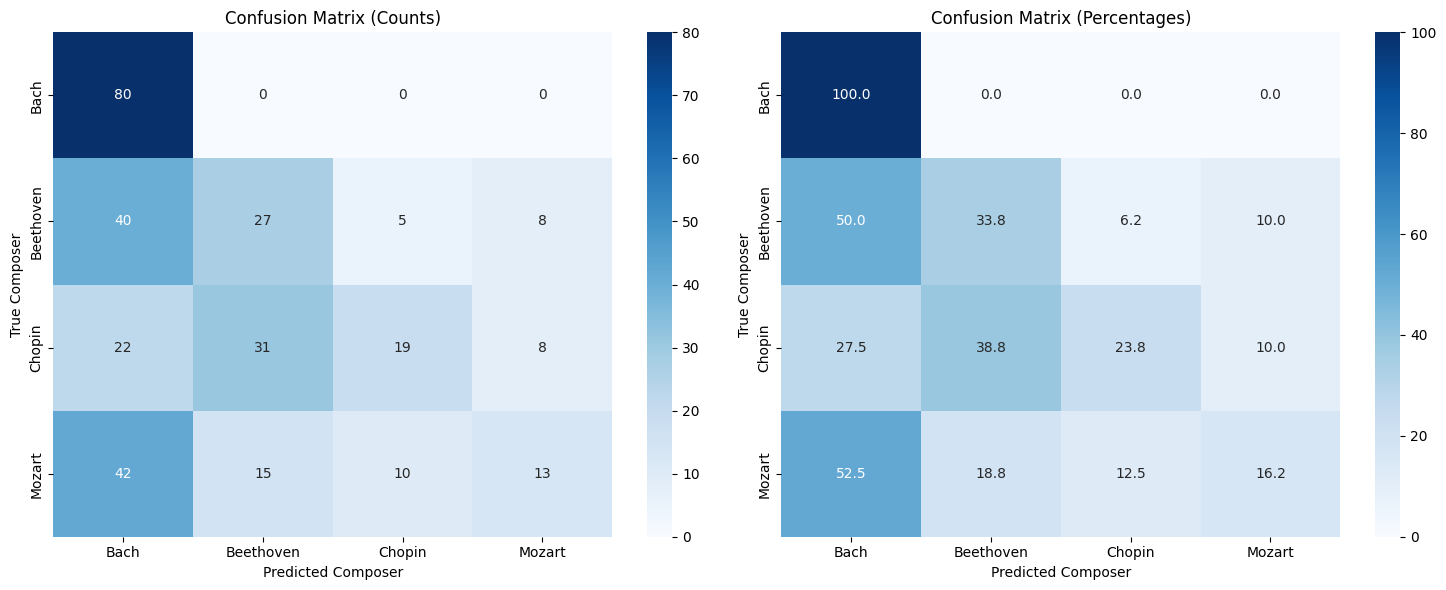


  🎯 Prediction Confidence Analysis:
    Bach: Mean confidence = 0.422
    Beethoven: Mean confidence = 0.381
    Chopin: Mean confidence = 0.378
    Mozart: Mean confidence = 0.367

Step 9: Training analysis...


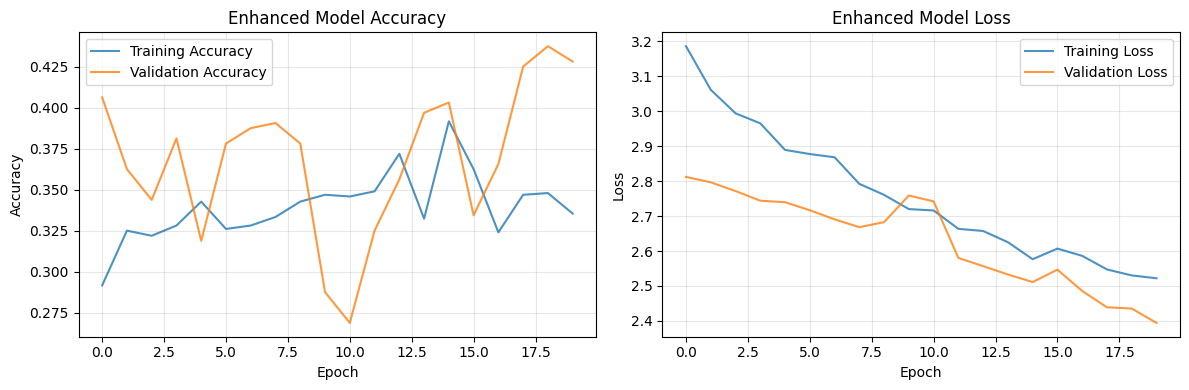

In [89]:


# Step 7: Train enhanced model
print(f"\nStep 7: Training enhanced model...")
trained_model, training_history = train_enhanced_model(
    enhanced_model, X_train_norm, y_train_onehot,
    X_val_norm, y_val_onehot, class_weights
)

# Step 8: Enhanced evaluation
test_accuracy = enhanced_evaluation(
    trained_model, X_test_norm, y_test_onehot, label_encoder
)

# Step 9: Plot training history
print(f"\nStep 9: Training analysis...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(training_history.history['accuracy'], label='Training Accuracy', alpha=0.8)
ax1.plot(training_history.history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
ax1.set_title('Enhanced Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(training_history.history['loss'], label='Training Loss', alpha=0.8)
ax2.plot(training_history.history['val_loss'], label='Validation Loss', alpha=0.8)
ax2.set_title('Enhanced Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()